<a href="https://colab.research.google.com/github/KurniaKhaikal/Corel-CBIR/blob/main/Image_search_new-terFIXXXX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Feature extractor

In [55]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
import numpy as np

# See https://keras.io/api/applications/ for details

class FeatureExtractor:
    def __init__(self):
        base_model = VGG16(weights='imagenet')
        self.model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc1').output)

    def extract(self, img):
        """
        Extract a deep feature from an input image
        Args:
            img: from PIL.Image.open(path) or tensorflow.keras.preprocessing.image.load_img(path)

        Returns:
            feature (np.ndarray): deep feature with the shape=(4096, )
        """
        img = img.resize((224, 224))  # VGG must take a 224x224 img as an input
        img = img.convert('RGB')  # Make sure img is color
        x = image.img_to_array(img)  # To np.array. Height x Width x Channel. dtype=float32
        x = np.expand_dims(x, axis=0)  # (H, W, C)->(1, H, W, C), where the first elem is the number of img
        x = preprocess_input(x)  # Subtracting avg values for each pixel
        feature = self.model.predict(x)[0]  # (1, 4096) -> (4096, )
        return feature / np.linalg.norm(feature)  # Normalize


Offline

In [56]:
# pip install feature-extractor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [57]:
from PIL import Image
# from feature-extractor import FeatureExtractor
from pathlib import Path
import numpy as np

if __name__ == '__main__':
    fe = FeatureExtractor()

    for img_path in sorted(Path("/content/drive/MyDrive/Corel-1kNew/image").glob("*.jpg")):
        print(img_path)  # e.g., ./static/img/xxx.jpg
        feature = fe.extract(img=Image.open(img_path))
        feature_path = Path("/content/drive/MyDrive/Corel-1kNew/feature") / (img_path.stem + ".npy")  # e.g., ./static/feature/xxx.npy
        np.save(feature_path, feature)

/content/drive/MyDrive/Corel-1kNew/image/0.jpg
/content/drive/MyDrive/Corel-1kNew/image/1.jpg
/content/drive/MyDrive/Corel-1kNew/image/100.jpg
/content/drive/MyDrive/Corel-1kNew/image/101.jpg
/content/drive/MyDrive/Corel-1kNew/image/102.jpg
/content/drive/MyDrive/Corel-1kNew/image/103.jpg
/content/drive/MyDrive/Corel-1kNew/image/104.jpg
/content/drive/MyDrive/Corel-1kNew/image/105.jpg
/content/drive/MyDrive/Corel-1kNew/image/106.jpg
/content/drive/MyDrive/Corel-1kNew/image/107.jpg
/content/drive/MyDrive/Corel-1kNew/image/108.jpg
/content/drive/MyDrive/Corel-1kNew/image/109.jpg
/content/drive/MyDrive/Corel-1kNew/image/2.jpg
/content/drive/MyDrive/Corel-1kNew/image/200.jpg
/content/drive/MyDrive/Corel-1kNew/image/201.jpg
/content/drive/MyDrive/Corel-1kNew/image/202.jpg
/content/drive/MyDrive/Corel-1kNew/image/203.jpg
/content/drive/MyDrive/Corel-1kNew/image/204.jpg
/content/drive/MyDrive/Corel-1kNew/image/205.jpg
/content/drive/MyDrive/Corel-1kNew/image/206.jpg
/content/drive/MyDrive/Cor

server

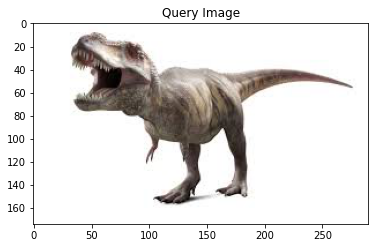

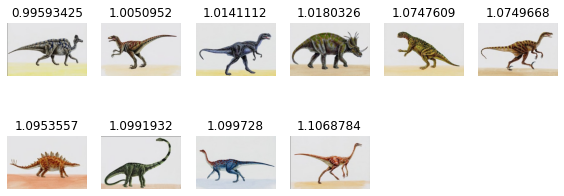

In [60]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
# from feature_extractor import FeatureExtractor
from datetime import datetime
from flask import Flask, request, render_template
from pathlib import Path

# app = Flask(__name__)

# Upload
img_name = "/content/drive/MyDrive/Corel-1kNew/upload/trex.jpg"
img = Image.open(img_name)

# Read image features
fe = FeatureExtractor()
features = []
img_paths = []
for feature_path in Path("/content/drive/MyDrive/Corel-1kNew/feature").glob("*.npy"):
    features.append(np.load(feature_path))
    img_paths.append(Path("/content/drive/MyDrive/Corel-1kNew/image") / (feature_path.stem + ".jpg"))
features = np.array(features)

# Run Search
query = fe.extract(img)
dists = np.linalg.norm(features-query, axis=1)  # L2 distances to features
ids = np.argsort(dists)[:10]  # Top 20 results
scores = [(dists[id], img_paths[id]) for id in ids]

# len(scores)

# Visualize

import matplotlib.image as mpimg

read_image = mpimg.imread(img_name)
plt.title("Query Image")
plt.imshow(read_image)
plt.show()

print(" ")

axes=[]
fig=plt.figure(figsize=(8,8))
for a in range(10):
    score = scores[a]
    axes.append(fig.add_subplot(5, 6, a+1))
    subplot_title=str(score[0])
    axes[-1].set_title(subplot_title)  
    plt.axis('off')
    plt.imshow(Image.open(score[1]))
fig.tight_layout()
plt.show()

# max_hasil = 12
# hasil = [imgNames[index] for i,index in enumerate(rank_ID[0:max_hasil])]
# print(" ")
# fig = plt.figure(figsize=(10, 10))

# for i,im in enumerate(hasil):
#     fig.add_subplot(3, 4, i+1)
#     plt.axis('off')
#     plt.subplots_adjust(wspace=None, hspace=None)
#     img_result = mpimg.imread(base_dataset+"/"+str(im, 'utf-8'))
#     plt.title("Hasil %d" %(i+1))
#     plt.imshow(img_result)


# @app.route('/', methods=['GET', 'POST'])
# def index():
#     if request.method == 'POST':
#         file = request.files['query_img']

#         # Save query image
#         img = Image.open(file.stream)  # PIL image
#         uploaded_img_path = "static/uploaded/" + datetime.now().isoformat().replace(":", ".") + "_" + file.filename
#         img.save(uploaded_img_path)

#         # Run search
#         query = fe.extract(img)
#         dists = np.linalg.norm(features-query, axis=1)  # L2 distances to features
#         ids = np.argsort(dists)[:30]  # Top 30 results
#         scores = [(dists[id], img_paths[id]) for id in ids]

#         return render_template('index.html',
#                                query_path=uploaded_img_path,
#                                scores=scores)
#     else:
#         return render_template('index.html')


# if __name__=="__main__":
#     app.run("0.0.0.0")